In [12]:
import pandas as pd
from models import car_calcaulator2

In [13]:
# 读取数据

df_raw = pd.read_excel("./data/processed/股份回购与分红合并_添加Treat_Post.xlsx", dtype={"Code":str}).iloc[:,1:]
print(df_raw.info())
df_raw.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   代码             14485 non-null  object        
 1   Code           14485 non-null  object        
 2   简称             14485 non-null  object        
 3   Year           14485 non-null  int64         
 4   最新公告日期         14485 non-null  datetime64[ns]
 5   回购进度           14485 non-null  object        
 6   首次公布完成日期       13548 non-null  datetime64[ns]
 7   回购方式           14485 non-null  object        
 8   回购目的           14485 non-null  object        
 9   已回购数量(股)       13877 non-null  float64       
 10  占总股本比例(%)      13877 non-null  float64       
 11  已回购金额(元)       13704 non-null  float64       
 12  回购均价           13693 non-null  float64       
 13  占公告回购总资金比例(%)  13676 non-null  float64       
 14  占公告回购总数量比例(%)  13863 non-null  float64       
 15  较最新收盘价涨跌幅(%)   1369

,代码,Code,简称,Year,最新公告日期,回购进度,首次公布完成日期,回购方式,回购目的,已回购数量(股),...,IEqTnRt,EqBenmk,EqBenmkDt,AnnDt,RecordDt,DRDt,DPRDt,BnsShrLDt,Treat,Post
0,000002.SZ,2,万科A,2022,2022-07-02,完成,2022-07-02,集中竞价交易,其他回购目的,72955992.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,000002.SZ,2,万科A,2016,2016-01-15,完成,2016-01-15,集中竞价交易,市值管理,12480299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,000004.SZ,4,*ST国华,2023,2023-07-27,实施,NaT,定向回购,盈利补偿,467726.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [14]:
print(df_raw["回购目的"].value_counts())


回购目的
股权激励注销           9097
实施股权激励或员工持股计划    1810
其他回购目的           1479
市值管理             1090
盈利补偿              541
实施股权激励            287
员工持股计划            131
维护公司价值及股东权益        39
转换公司可转债             9
重组                  2
Name: count, dtype: int64


In [16]:
# 参数设置（参考事件研究方法论标准）
# 估计期: [-120, -21] 排除事件日前20天，避免信息泄露
# 事件窗口期: [-10, 10] 覆盖事件前后足够的交易日
df_car = df_raw.copy()
df_car = df_car[df_car["回购目的"].isin(["市值管理", "维护公司价值及股东权益"])]  

calculator = car_calcaulator2.FastBatchCARCalculator(
    df_car, 
    stock_col="代码", 
    date_col="预案日", 
    estimation_window=(-120, -21),  # 估计期：事件前120到21个交易日
    event_window=(-10, 10),  
    date_range=('2022-01-01', '2023-12-31')         # 事件窗口：事件前后10个交易日
)

print("开始拟合模型...")
calculator.fit()


时间筛选: 2022-01-01 至 2023-12-31
  原始样本数: 1129, 筛选后样本数: 246 (保留 21.8%)
开始拟合模型...
>>> [Step 1] 准备基础数据...
    数据请求区间: 2021-04-17 至 2025-12-09
    加载缓存的大盘数据...
    共需获取 225 只股票的数据
    加载缓存的个股数据矩阵 (这可能需要一点时间)...
    数据准备完成。

>>> [Step 2] 开始拟合回归 (Fit)...
Fit 完成。新计算: 0, 跳过(已存在): 245
    数据准备完成。

>>> [Step 2] 开始拟合回归 (Fit)...
Fit 完成。新计算: 0, 跳过(已存在): 245


## 计算AAR和CAAR

AAR (Average Abnormal Return): 平均超额收益率
CAAR (Cumulative Average Abnormal Return): 累计平均超额收益率

In [17]:
caar_result = calculator.calculate_caar(group_col='Post')
caar_result.head()

>>> 计算分组AAR和CAAR (按 Post 列分组)...
  发现分组: [0, 1]
  处理 Post=0, 样本数: 53
    成功读取 53 个样本的AR数据
  处理 Post=1, 样本数: 193
    成功读取 192 个样本的AR数据
  计算AAR和CAAR（共 21 个交易日）...

AAR和CAAR 计算完成！
    成功读取 192 个样本的AR数据
  计算AAR和CAAR（共 21 个交易日）...

AAR和CAAR 计算完成！


,T,AAR_0,AAR_0_Pval,CAAR_0,CAAR_0_Pval,N_0,AAR_1,AAR_1_Pval,CAAR_1,CAAR_1_Pval,N_1
0,-10,0.002555,0.560613,0.002555,0.560613,53,-0.003700,0.031272,-0.003700,0.031272,192
1,-9,0.001689,0.582529,0.004244,0.425095,53,-0.001396,0.433871,-0.005096,0.039363,192
2,-8,0.002264,0.636417,0.006507,0.360619,53,-0.001182,0.456217,-0.006278,0.032448,192
3,-7,-0.003816,0.239622,0.002691,0.730660,53,-0.001654,0.233763,-0.007932,0.014504,192
4,-6,-0.002172,0.464186,0.000519,0.950451,53,0.002051,0.289564,-0.005880,0.119753,192


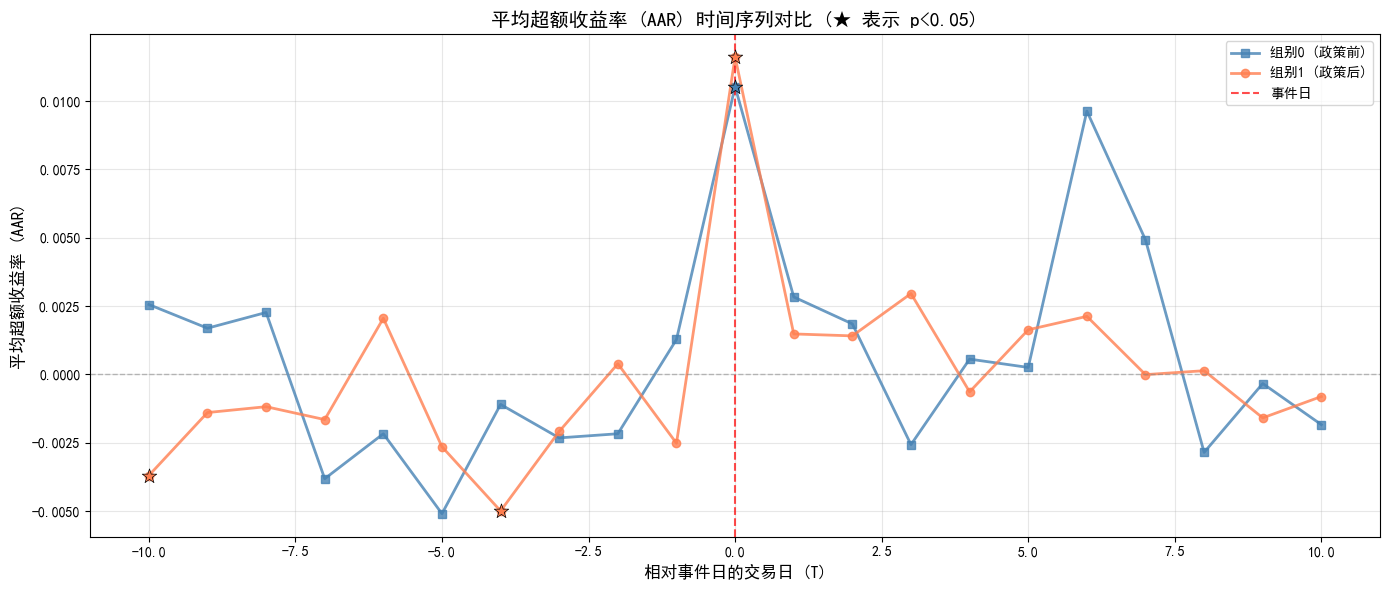

✓ AAR时间序列图已保存至: ./plot/AAR_时间序列对比.png


In [18]:
# 可视化AAR和CAAR结果
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 确保plot目录存在
if not os.path.exists('./plot'):
    os.makedirs('./plot')

# 1. AAR时间序列对比图
fig, ax = plt.subplots(figsize=(14, 6))

# 绘制AAR时间序列
ax.plot(caar_result['T'], caar_result['AAR_0'], 
        marker='s', label='组别0 (政策前)', linewidth=2, alpha=0.8, color='steelblue')
ax.plot(caar_result['T'], caar_result['AAR_1'], 
        marker='o', label='组别1 (政策后)', linewidth=2, alpha=0.8, color='coral')

# 标记显著的AAR点
for i, row in caar_result.iterrows():
    # 组别0 显著性
    if row['AAR_0_Pval'] < 0.05:
        ax.scatter(row['T'], row['AAR_0'], 
                  color='steelblue', s=120, marker='*', zorder=5, edgecolors='black', linewidths=0.5)
    # 组别1 显著性
    if row['AAR_1_Pval'] < 0.05:
        ax.scatter(row['T'], row['AAR_1'], 
                  color='coral', s=120, marker='*', zorder=5, edgecolors='black', linewidths=0.5)

# 添加零线和事件日标记
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='事件日')

ax.set_xlabel('相对事件日的交易日 (T)', fontsize=12)
ax.set_ylabel('平均超额收益率 (AAR)', fontsize=12)
ax.set_title('平均超额收益率 (AAR) 时间序列对比 (★ 表示 p<0.05)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./plot/AAR_时间序列对比.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ AAR时间序列图已保存至: ./plot/AAR_时间序列对比.png")

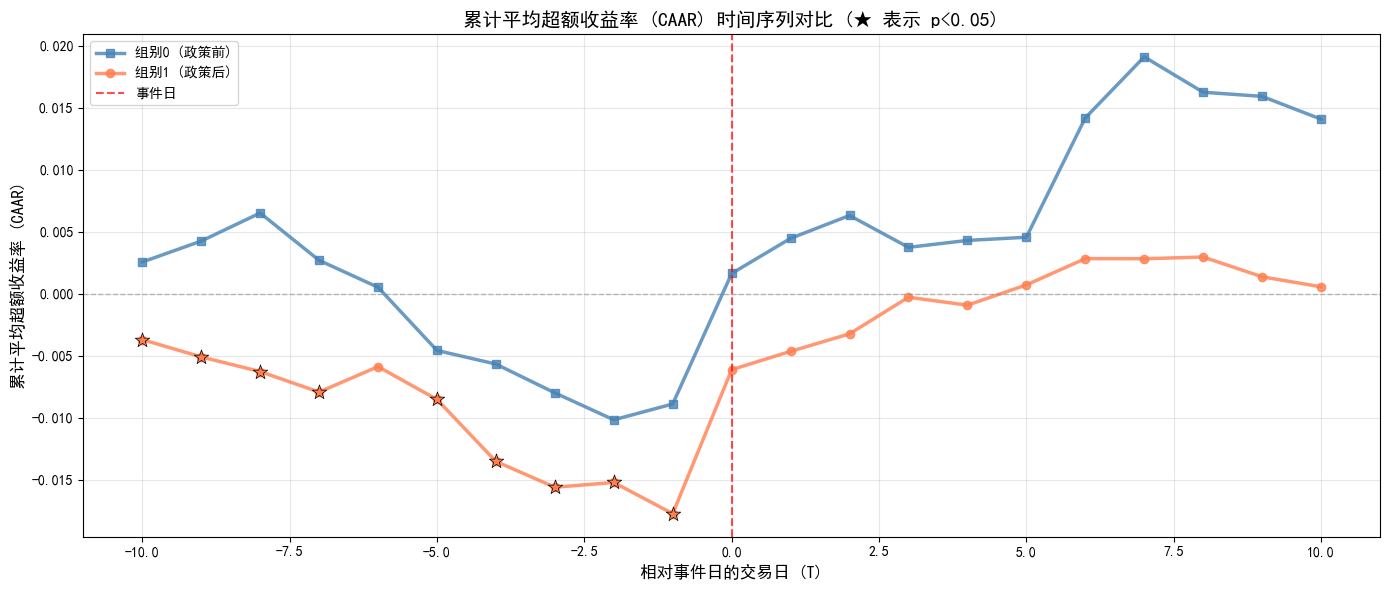

✓ CAAR时间序列图已保存至: ./plot/CAAR_时间序列对比.png


In [19]:
# 2. CAAR累计超额收益率时间序列
fig, ax = plt.subplots(figsize=(14, 6))

# 绘制CAAR时间序列
ax.plot(caar_result['T'], caar_result['CAAR_0'], 
        marker='s', label='组别0 (政策前)', linewidth=2.5, alpha=0.8, color='steelblue')
ax.plot(caar_result['T'], caar_result['CAAR_1'], 
        marker='o', label='组别1 (政策后)', linewidth=2.5, alpha=0.8, color='coral')

# 标记显著的CAAR点
for i, row in caar_result.iterrows():
    # 组别0 显著性
    if row['CAAR_0_Pval'] < 0.05:
        ax.scatter(row['T'], row['CAAR_0'], 
                  color='steelblue', s=120, marker='*', zorder=5, edgecolors='black', linewidths=0.5)
    # 组别1 显著性
    if row['CAAR_1_Pval'] < 0.05:
        ax.scatter(row['T'], row['CAAR_1'], 
                  color='coral', s=120, marker='*', zorder=5, edgecolors='black', linewidths=0.5)

# 添加零线和事件日标记
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='事件日')

ax.set_xlabel('相对事件日的交易日 (T)', fontsize=12)
ax.set_ylabel('累计平均超额收益率 (CAAR)', fontsize=12)
ax.set_title('累计平均超额收益率 (CAAR) 时间序列对比 (★ 表示 p<0.05)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./plot/CAAR_时间序列对比.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ CAAR时间序列图已保存至: ./plot/CAAR_时间序列对比.png")

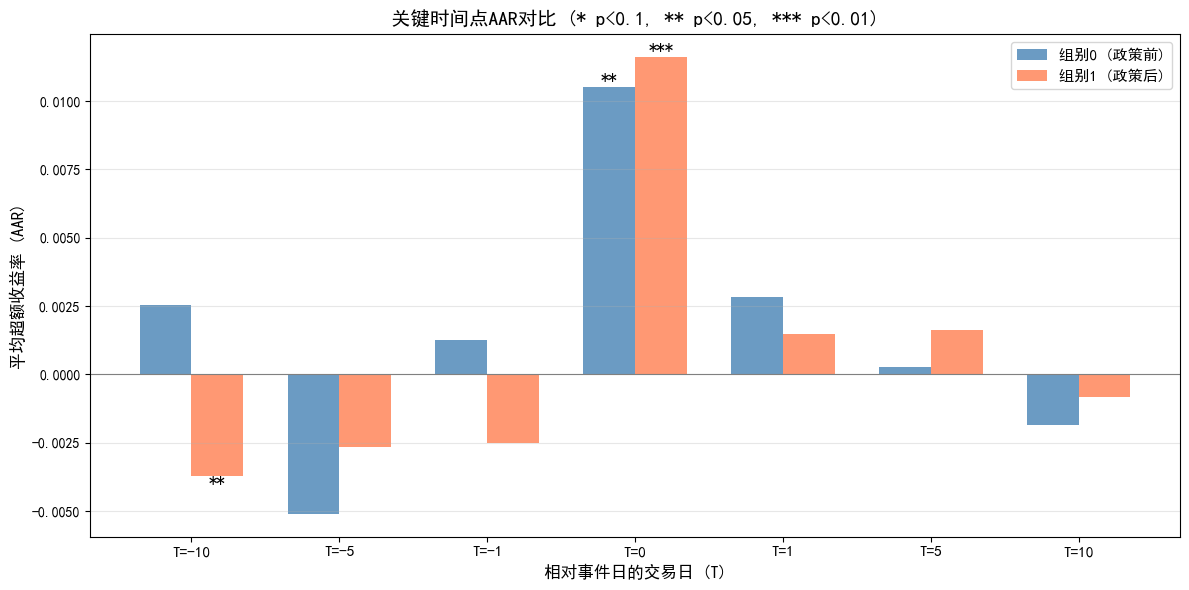

✓ AAR关键时间点对比图已保存至: ./plot/AAR_关键时间点对比.png


In [20]:
# 3. AAR柱状图对比（选择几个关键时间点）
key_times = [-10, -5, -1, 0, 1, 5, 10]
key_data = caar_result[caar_result['T'].isin(key_times)].copy()

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(key_data))
width = 0.35

bars1 = ax.bar(x - width/2, key_data['AAR_0'].values, width, 
               label='组别0 (政策前)', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, key_data['AAR_1'].values, width, 
               label='组别1 (政策后)', alpha=0.8, color='coral')

# 添加显著性标记
for i, (idx, row) in enumerate(key_data.iterrows()):
    # 组别0 显著性
    if row['AAR_0_Pval'] < 0.01:
        sig_mark = '***'
    elif row['AAR_0_Pval'] < 0.05:
        sig_mark = '**'
    elif row['AAR_0_Pval'] < 0.1:
        sig_mark = '*'
    else:
        sig_mark = ''
    
    if sig_mark:
        ax.text(i - width/2, row['AAR_0'], sig_mark,
                ha='center', va='bottom' if row['AAR_0'] > 0 else 'top', 
                fontsize=12, fontweight='bold')
    
    # 组别1 显著性
    if row['AAR_1_Pval'] < 0.01:
        sig_mark = '***'
    elif row['AAR_1_Pval'] < 0.05:
        sig_mark = '**'
    elif row['AAR_1_Pval'] < 0.1:
        sig_mark = '*'
    else:
        sig_mark = ''
    
    if sig_mark:
        ax.text(i + width/2, row['AAR_1'], sig_mark,
                ha='center', va='bottom' if row['AAR_1'] > 0 else 'top', 
                fontsize=12, fontweight='bold')

ax.set_xlabel('相对事件日的交易日 (T)', fontsize=12)
ax.set_ylabel('平均超额收益率 (AAR)', fontsize=12)
ax.set_title('关键时间点AAR对比 (* p<0.1, ** p<0.05, *** p<0.01)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'T={int(t)}' for t in key_data['T']], fontsize=11)
ax.legend(fontsize=11)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('./plot/AAR_关键时间点对比.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ AAR关键时间点对比图已保存至: ./plot/AAR_关键时间点对比.png")

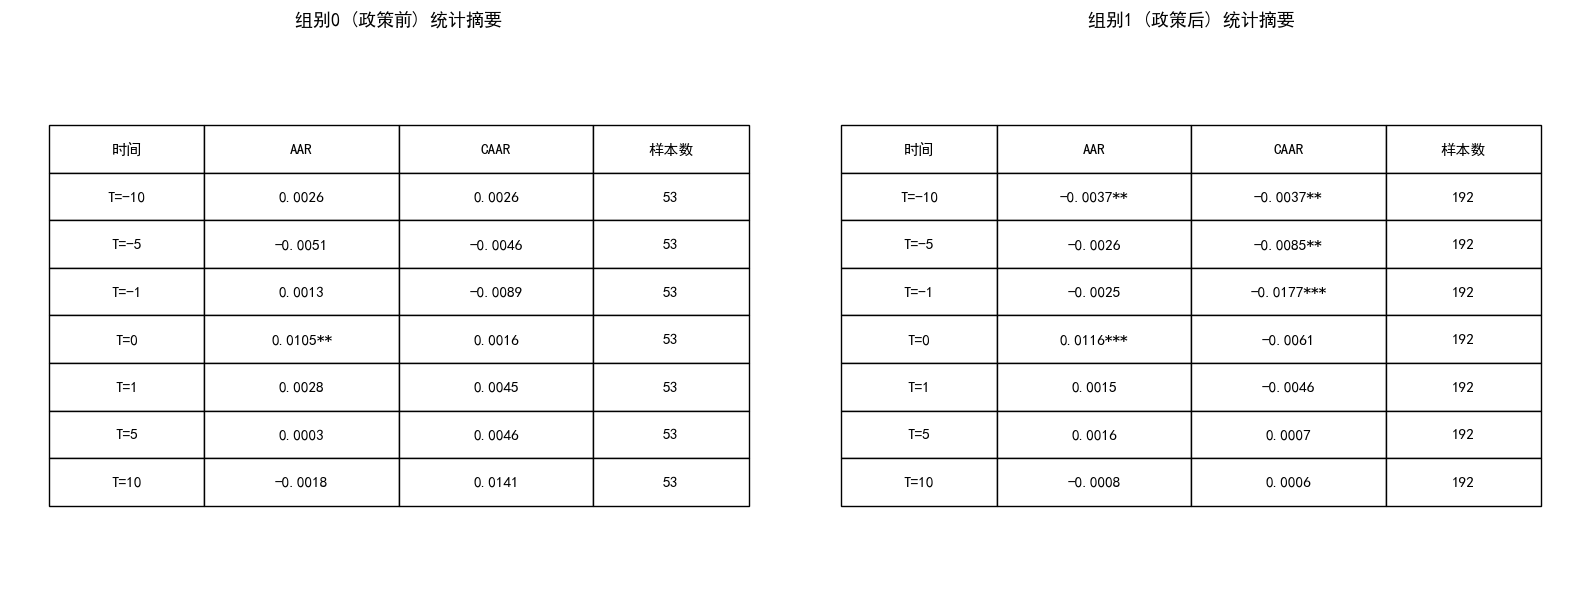

✓ 统计摘要表已保存至: ./plot/AAR_CAAR_统计表.png


In [21]:
# 4. 统计摘要表格
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 选择关键时间点
key_times_table = [-10, -5, -1, 0, 1, 5, 10]
summary_data = caar_result[caar_result['T'].isin(key_times_table)].copy()

# 组别0的表格
table_data_0 = []
for _, row in summary_data.iterrows():
    aar_sig = '***' if row['AAR_0_Pval'] < 0.01 else '**' if row['AAR_0_Pval'] < 0.05 else '*' if row['AAR_0_Pval'] < 0.1 else ''
    caar_sig = '***' if row['CAAR_0_Pval'] < 0.01 else '**' if row['CAAR_0_Pval'] < 0.05 else '*' if row['CAAR_0_Pval'] < 0.1 else ''
    table_data_0.append([
        f"T={int(row['T'])}",
        f"{row['AAR_0']:.4f}{aar_sig}",
        f"{row['CAAR_0']:.4f}{caar_sig}",
        f"{row['N_0']:.0f}"
    ])

table1 = axes[0].table(cellText=table_data_0,
                       colLabels=['时间', 'AAR', 'CAAR', '样本数'],
                       cellLoc='center',
                       loc='center',
                       colWidths=[0.2, 0.25, 0.25, 0.2])
table1.auto_set_font_size(False)
table1.set_fontsize(11)
table1.scale(1, 2.5)
axes[0].axis('off')
axes[0].set_title('组别0 (政策前) 统计摘要', fontsize=13, fontweight='bold', pad=20)

# 组别1的表格
table_data_1 = []
for _, row in summary_data.iterrows():
    aar_sig = '***' if row['AAR_1_Pval'] < 0.01 else '**' if row['AAR_1_Pval'] < 0.05 else '*' if row['AAR_1_Pval'] < 0.1 else ''
    caar_sig = '***' if row['CAAR_1_Pval'] < 0.01 else '**' if row['CAAR_1_Pval'] < 0.05 else '*' if row['CAAR_1_Pval'] < 0.1 else ''
    table_data_1.append([
        f"T={int(row['T'])}",
        f"{row['AAR_1']:.4f}{aar_sig}",
        f"{row['CAAR_1']:.4f}{caar_sig}",
        f"{row['N_1']:.0f}"
    ])

table2 = axes[1].table(cellText=table_data_1,
                       colLabels=['时间', 'AAR', 'CAAR', '样本数'],
                       cellLoc='center',
                       loc='center',
                       colWidths=[0.2, 0.25, 0.25, 0.2])
table2.auto_set_font_size(False)
table2.set_fontsize(11)
table2.scale(1, 2.5)
axes[1].axis('off')
axes[1].set_title('组别1 (政策后) 统计摘要', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('./plot/AAR_CAAR_统计表.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 统计摘要表已保存至: ./plot/AAR_CAAR_统计表.png")

In [22]:
# 5. 保存结果到Excel
caar_result.to_excel('./data/processed/AAR_CAAR_分组结果.xlsx', index=False)

# 创建一个带有格式化的摘要表
summary_for_export = caar_result.copy()
summary_for_export['AAR_0_显著'] = summary_for_export['AAR_0_Pval'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)
summary_for_export['AAR_1_显著'] = summary_for_export['AAR_1_Pval'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)
summary_for_export['CAAR_0_显著'] = summary_for_export['CAAR_0_Pval'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)
summary_for_export['CAAR_1_显著'] = summary_for_export['CAAR_1_Pval'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

with pd.ExcelWriter('./data/processed/AAR_CAAR_完整分析结果.xlsx') as writer:
    caar_result.to_excel(writer, sheet_name='原始数据', index=False)
    summary_for_export.to_excel(writer, sheet_name='带显著性标记', index=False)

print("✓ 所有结果已保存")
print("  - 原始数据: ./data/processed/AAR_CAAR_分组结果.xlsx")
print("  - 完整分析: ./data/processed/AAR_CAAR_完整分析结果.xlsx")
print("  - 可视化图表已保存至: ./plot/ 目录")
print(f"\n数据摘要:")
print(f"  时间窗口: T={caar_result['T'].min()} 至 T={caar_result['T'].max()}")
print(f"  组别0样本数: {caar_result['N_0'].iloc[0]:.0f}")
print(f"  组别1样本数: {caar_result['N_1'].iloc[0]:.0f}")

✓ 所有结果已保存
  - 原始数据: ./data/processed/AAR_CAAR_分组结果.xlsx
  - 完整分析: ./data/processed/AAR_CAAR_完整分析结果.xlsx
  - 可视化图表已保存至: ./plot/ 目录

数据摘要:
  时间窗口: T=-10 至 T=10
  组别0样本数: 53
  组别1样本数: 192
